# Problem 1

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### a.)
Load and preprocess the data using Pandas and remove the unneeded attributes. For the purpose of this assignment you do not need to normalize or standardize the data unless explicitly required in one of the following tasks. However, you may need to handle missing values by imputing those values based on variable means. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set. Separate the target attribute for regression. Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data (important note: for reporducible output across multiple runs, please use "random_state = 33"). Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [58]:
df = pd.read_csv("communities.csv", na_values=["?"])
df.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [59]:
df.shape

(1994, 100)

In [60]:
#drop uneeded attributes
df.drop(columns=['state','communityname'], inplace=True)
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [61]:
#check for missing vals - no missing vals, OtherPerCap obj type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 98 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             1994 non-null   float64
 1   householdsize          1994 non-null   float64
 2   racepctblack           1994 non-null   float64
 3   racePctWhite           1994 non-null   float64
 4   racePctAsian           1994 non-null   float64
 5   racePctHisp            1994 non-null   float64
 6   agePct12t21            1994 non-null   float64
 7   agePct12t29            1994 non-null   float64
 8   agePct16t24            1994 non-null   float64
 9   agePct65up             1994 non-null   float64
 10  numbUrban              1994 non-null   float64
 11  pctUrban               1994 non-null   float64
 12  medIncome              1994 non-null   float64
 13  pctWWage               1994 non-null   float64
 14  pctWFarmSelf           1994 non-null   float64
 15  pctW

In [65]:
#convert OtherPerCap NA to average of col
OtherPerCap_mean = df['OtherPerCap'].mean()
df['OtherPerCap'].fillna(OtherPerCap_mean,axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 98 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             1994 non-null   float64
 1   householdsize          1994 non-null   float64
 2   racepctblack           1994 non-null   float64
 3   racePctWhite           1994 non-null   float64
 4   racePctAsian           1994 non-null   float64
 5   racePctHisp            1994 non-null   float64
 6   agePct12t21            1994 non-null   float64
 7   agePct12t29            1994 non-null   float64
 8   agePct16t24            1994 non-null   float64
 9   agePct65up             1994 non-null   float64
 10  numbUrban              1994 non-null   float64
 11  pctUrban               1994 non-null   float64
 12  medIncome              1994 non-null   float64
 13  pctWWage               1994 non-null   float64
 14  pctWFarmSelf           1994 non-null   float64
 15  pctW

In [66]:
#summary statistics for each attr
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0
agePct12t29,1994.0,0.493867,0.143564,0.0,0.4100,0.480,0.5400,1.0
agePct16t24,1994.0,0.336264,0.166505,0.0,0.2500,0.290,0.3600,1.0
agePct65up,1994.0,0.423164,0.179185,0.0,0.3000,0.420,0.5300,1.0


In [78]:
df_names = df.columns.values
X = df[df_names[:-1]]
y = df['ViolentCrimesPerPop']

array(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
       'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8',
       'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
       'PctRecImmig10', 'Pct

In [68]:
#train test split size 80/20, random_state=33
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=33)

In [514]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1595, 97) (399, 97) (1595,) (399,)


## Summary
After loading the dataset, I dropped the two categorical variables state and community name, and then checked for any missing values or NAs with the info method. OtherPerCap was the only variable with an NA, so I replaced the NA with the average value for that column. Then I calculated the summary statistics for each attribute, and finally divided the data into training and testing data and used the scikitlearn function to split the data 80/20 with a random state of 33, which was specified.

### b.)
Perform standard multiple linear regression on data using the scikit-learn Linear Regression module. Compute the RMSE values on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [69]:
#import linear regression module, fit training data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [284]:
#RMSE calculation on training data
from sklearn.metrics import mean_squared_error
p_train = linreg.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(p_train, y_train))
print("RMSE on Train Data: ", rmse_train)

RMSE on Train Data:  0.12653828778368506


Text(0.5, 1.0, 'Target Train vs Predicted Train')

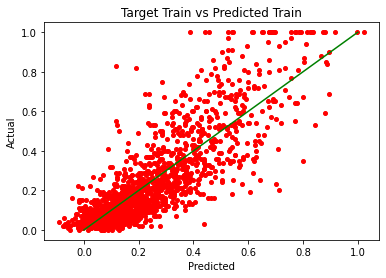

In [77]:
#Correlation between predicted and actual values of target attr
plt.plot(p_train, y_train, 'ro', markersize=4)
plt.plot([0,1], [0,1], 'g-')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Target Train vs Predicted Train")

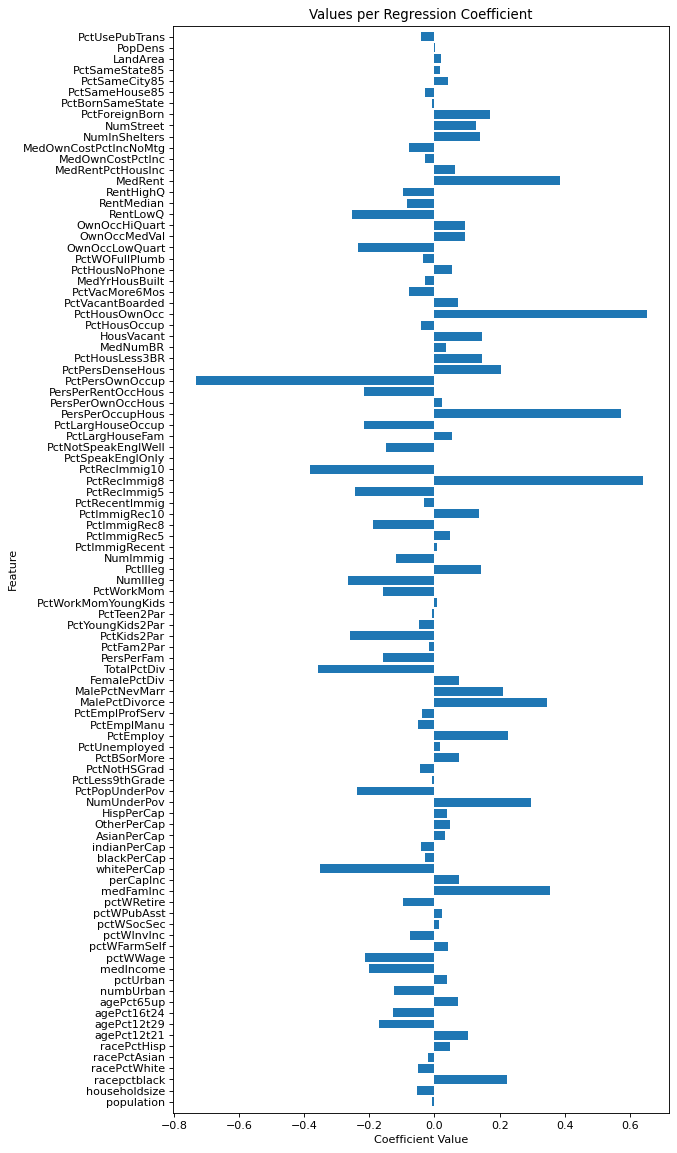

In [97]:
#Graphing regression coefficients/weights
X_names = X_train.columns.values
def plot_coefficients(model, n_features, feature_names):
    plt.figure(figsize=(8, 18), dpi=80)
    plt.barh(range(n_features), model.coef_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Values per Regression Coefficient")
plot_coefficients(linreg, len(X_names), X_names)

In [282]:
#cross validate function
def cross_validate(model, X, y, n, verbose=False):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=n, random_state=33, shuffle=True)
    
    xval_err = 0
    f = 1
    for train,test in kf.split(X):
        model.fit(X[train], y[train]) #fit model to the training partition in this fold
        p_test = model.predict(X[test]) #apply trained model to test partition in this fold
        rmse_test = np.sqrt(mean_squared_error(p_test, y[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse_test))
        xval_err += rmse_test
        f += 1
    return xval_err/n

In [285]:
#convert X,y to np arrays, perform 10 fold cv, compare to train RMSE
X_train = np.array(X_train)
y_train = np.array(y_train)
cv_RMSE = cross_validate(linreg, X_train, y_train, 10)
print(f"10 fold CV RMSE: {cv_RMSE}")
print(f"Training RMSE:   {rmse_train}")

10 fold CV RMSE: 0.13460820375825627
Training RMSE:   0.12653828778368506


### c.)
Feature Selection:  use the scikit-learn to select the best subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data; target variable; the regression model; and any other parameters you find necessary. The function should return the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (use k=5 for consistency) and use feature_selection.SelectPercentile to find the most informative variables for a range of percentile values [Note: since this is regression not classification, in the SelectPercentile function you should use feature_selection.f_regression as scoring function rather than chi2). You should also plot the model's error values on cross-validation using only the selected features across the range of percentile values. For variety, in this part we will use Mean Absolute Error (MAE) as the error metric instead of RMSE. For cross-validation, use scikit's cross_val_score function. In order to use cross_val_score with regression you'll need to pass to it a specific error function. In this case, you will use scoring='neg_mean_absolute_error' as a parameter. You should use aboslute values to convert these negated MAE values to positive MAE values. Your plot should look similar (but won't be exactly the same as this example). Once you have identified the best percentile based on cross-validation, use it to identify and display the corresponding best features. As a final step, train your model on the full 80% training data with the optimal subset of features and then compute it's peformance (again using MAE) on the set-aside 20% test partition.

In [248]:
def feature_selection(X, y, model, K=5):
    '''takes in the training/target variable and returns optimal percentage of the most informative features to use'''
    #import necessary packages
    from sklearn import feature_selection
    from sklearn.metrics import mean_absolute_error
    from sklearn.model_selection import cross_val_score
    
    err = {}
    attrs = {}
    #cross validation / feature selection / mean absolute error
    for i in range(1,101):
        #convert data to np arrays
        X = np.array(X)
        y = np.array(y)
        
        #SelectPercentile, fit model, perform cv MAE
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        X_train_fs = fs.fit_transform(X, y)
        scores = abs(cross_val_score(model, X_train_fs, y, scoring = 'neg_mean_absolute_error', cv=K))
        #print(scores)
        #store percentile and avg cross val score
        err[i] = scores.mean()
        
        #store optimal features
        X = pd.DataFrame(X, columns=df_names[:-1])
        attrs[i] = X.columns[fs.get_support()].values
        #calculate MAE w/ percentile
    
    
    plt.plot(err.keys(), err.values())
    plt.title("Mean Absolute Error with Percent of Features Selected")
    plt.xlabel("Percentage of Features Selected")
    plt.ylabel("Cross Validation Mean Absolute Error")
    
    return min(err, key=err.get), attrs

41

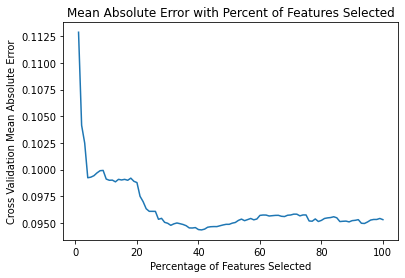

In [250]:
#Return Optimal Index and Plot of MAE
ind,attrs =feature_selection(X_train, y_train, linreg)
ind

In [269]:
#Best features
attrs[ind]

array(['population', 'racepctblack', 'racePctWhite', 'numbUrban',
       'medIncome', 'pctWWage', 'pctWInvInc', 'pctWPubAsst', 'medFamInc',
       'perCapInc', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade',
       'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
       'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'NumIlleg',
       'PctIlleg', 'PctLargHouseFam', 'PctPersOwnOccup',
       'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant',
       'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
       'PctHousNoPhone', 'PctWOFullPlumb', 'MedRentPctHousInc',
       'NumInShelters', 'NumStreet'], dtype=object)

In [259]:
#Create subset train/test data w/ optimal features
X_train_pd = pd.DataFrame(X_train, columns=df_names[:-1])
X_test_pd = pd.DataFrame(X_test, columns=df_names[:-1])
X_train_fs = X_train_pd[attrs[ind]]
X_test_fs = X_test_pd[attrs[ind]]
X_train_fs.shape, X_test_fs.shape

((1595, 40), (399, 40))

In [267]:
#Train New Model, Calculate MAE on train/test data
linreg_fs = LinearRegression()
linreg_fs.fit(X_train_fs, y_train)
p_train = linreg_fs.predict(X_train_fs)
p_test = linreg_fs.predict(X_test_fs)
mae_train = mean_absolute_error(p_train, y_train)
mae_test = mean_absolute_error(p_test, y_test)
print(f"MAE train: {rmse_train}")
print(f"MAE test: {rmse_test}")

MAE train: 0.09213698242027112
MAE test: 0.10127083211050728


## Summary
I first calculated the optimal percentile and attributes with my feature_selection function, which included a plot of the Mean Absolute Error over each percentile. I got an optimal percentile of 41, with 40 different attributes kept. Then, I created a subset of the training and testing dataframes with my 40 optimal features, and computed the MAE for the training and testing data. As you can see, the MAE is slightly lower for the training data, but it doesn't look like we are overfitting either.

### d.)
Next, using the original train and test data in part (a), perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha hyperparameter (the regularization coefficient). You should create a function that takes as input the training data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values (this time using RMSE as the error metric) on the training and cross-validation splits across the specified values of alpha. Finally, using the best alpha values for each regression model, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observations and conclusions, especially about the impact of alpha on bias-variance trade-off. [Hint: for an example of a similar model optimization process please review the class example notebook.]

In [382]:
def ridge_lasso(X, y, a, model, K=5):
    '''performs Ridge or Lasso regression to find best alpha value and plots RMSE'''
    
    #import pertinent packages
    from sklearn.linear_model import Lasso
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import cross_val_score
    
    #set range for alpha hyperparameter
    if model == "L":
        
        alpha = np.linspace(.0001, a, 100)
    elif model == "R":
        alpha = np.linspace(.001, a, 100)
        
    
    cv = {}
    train = {}
    
    #Train model, cv, store error terms
    for i in alpha:
        
        #determine type (Ridge/Lasso) and fit model w/ i alpha level
        if model == "L":
            m = Lasso(alpha=i)
            m.fit(X, y)
            p = m.predict(X)
            rmse_train = np.sqrt(mean_squared_error(p, y))
        elif model == "R":
            m = Ridge(alpha=i)
            m.fit(X, y)
            p = m.predict(X)
            rmse_train = np.sqrt(mean_squared_error(p, y))
        #perform cv, store rmse scores
        scores = abs(cross_val_score(m, X, y, scoring = 'neg_root_mean_squared_error', cv=K))
        
        cv[i] = scores.mean()
        train[i] = rmse_train
       
    #plot error values
    plt.plot(cv.keys(), cv.values(), label="RMSE-XVal")
    plt.plot(train.keys(), train.values(), label="RMSE-Train")
    if model == "L":
        plt.title("Lasso Regression RMSE values for Given Alpha")
    else:
        plt.title("Ridge Regression RMSE values for Given Alpha")
    plt.legend(('RMSE-XVal', 'RMSE-Train'))
    plt.xlabel("Alpha")
    plt.ylabel("RMSE")
    
    return min(cv, key=cv.get), min(cv.values())
        
        
    

(0.0001, 0.13345088424186619)

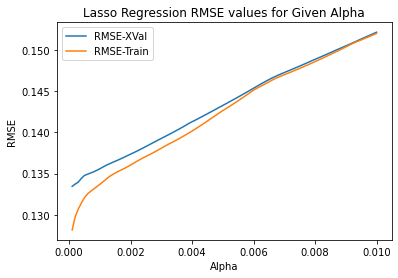

In [383]:
#Lasso Regression
l = ridge_lasso(X_train, y_train, .01 , "L")
l

(0.91, 0.13320681319726593)

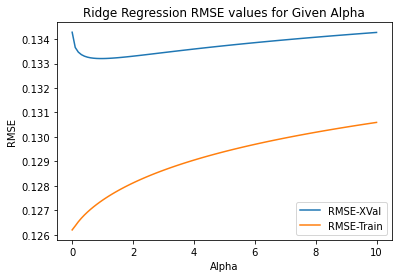

In [395]:
#Ridge Regression
r = ridge_lasso(X_train, y_train, 10, "R")
r

In [398]:
#Lasso Regression - optimal alpha
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.0001)
lasso.fit(X_train, y_train)
p_test = lasso.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(p_test, y_test))
print(f"Lasso RMSE test: {rmse_test}")

Lasso RMSE test: 0.14356532048937357


In [399]:
#Ridge Regression - optimal alpha
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.91)
ridge.fit(X_train, y_train)
p_test = ridge.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(p_test, y_test))
print(f"Ridge RMSE test: {rmse_test}")

Ridge RMSE test: 0.14333690150476355


## Summary
Looking at our lasso model, we can see that we had to choose a very small range of alpha values, .0001 to .01, due to the fact that anything higher was significantly increasing the bias of our model and RMSE values. Using cross validation, we get an alpha value of .0001 and after training the model with this value, get an RMSE test of .1435, which looks to be a bit higher than the .1334 cv value. Seeing as there is no significant gap changes between the train and cv values in our graph, we can assume that we are not overfitting our model.

For the ridge model, we chose alpha values to span over the range of .001 and 10, as the RMSE doesn't change significantly over that range. We ended with an alpha value of .91 and an RMSE test score of .1433, which was a bit higher than the .1332 cv value. The gap slightly changes over the range of alpha values, but given that the range is a lot more, it doesn't look like we are overfitting the model. The higher alpha score of .91 is adding bias to our model, but is still in line with what our lasso model is achieving as well.

### e.)
Next, perform regression using Stochastic Gradient Descent Regressor from scikit-learn (again use the original train-test split in part (a). Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search). Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, train the model on the full training partition and apply the model to the set-aside test data, comparing traning and test RMSE scores. Finally, perform model optimization (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model, trained on full training data, to the set-aside test data and compare to the training perfromance. Provide a brief summary of your findings from the above experiments.

In [400]:
from sklearn.linear_model import SGDRegressor

In [407]:
#standardize training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [410]:
#grid search, SGDR classifier
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty': ['l2', 'l1'],
    'alpha': np.linspace(.0001, 10, 100)
}
sgdreg = SGDRegressor()
gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

In [413]:
#run grid search with standardized data on sgdreg model
%time _ = gs.fit(X_train_s, y_train)

params, score = gs.best_params_, gs.best_score_
params, score

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 22 s, sys: 174 ms, total: 22.2 s
Wall time: 5.6 s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished


({'alpha': 0.10110909090909091, 'penalty': 'l2'}, 0.6526076143155072)

In [415]:
#using gs optimal results for parameters
sgdreg = SGDRegressor(penalty=params['penalty'], alpha = params['alpha']) 
sgdreg.fit(X_train_s, y_train)

#compare train and test RMSE scores
p_train = sgdreg.predict(X_train_s)
p_test = sgdreg.predict(X_test_s)
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")

RMSE Train: 0.1320326956052413
RMSE Test: 0.1471757153668259


In [437]:
#Find optimal l1_ratio w/ elastic net penalty SGDR
def sgdr(X, y, K=10):
    '''finds the optimal l1_ratio penalty parameter utilizing cv'''
    from sklearn.linear_model import SGDRegressor
    from sklearn.model_selection import cross_val_score
    
    l1 = np.linspace(0,1,100)
    train = {}
    cv = {}
    #for each l1, obtain the RMSE for train and cv
    for i in l1:
        sgdreg = SGDRegressor(penalty= 'elasticnet',l1_ratio=i)
        sgdreg.fit(X, y)
        p = sgdreg.predict(X)
        rmse_train = np.sqrt(mean_squared_error(p, y))

        # Compute RMSE using 10-fold x-validation
        scores = abs(cross_val_score(sgdreg, X, y, scoring = 'neg_root_mean_squared_error', cv=K))
        
        train[i] = rmse_train
        cv[i] = scores.mean()
    #plot values
    plt.plot(cv.keys(), cv.values(), label="RMSE-XVal")
    plt.plot(train.keys(), train.values(), label="RMSE-Train")
    plt.title("SGD Regression RMSE values for Given L1 Ratio")
    plt.legend(('RMSE-XVal', 'RMSE-Train'))
    plt.xlabel("L1 Ratio")
    plt.ylabel("RMSE")
    
    #return cv min value
    return min(cv, key=cv.get), min(cv.values())

(0.31313131313131315, 0.13715365138708527)

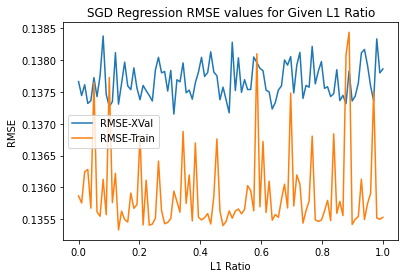

In [438]:
s = sgdr(X_train, y_train)
s

In [439]:
#using optimal l1_ratio for parameters
sgdreg = SGDRegressor(penalty = 'elasticnet', l1_ratio = s[0])
sgdreg.fit(X_train_s, y_train)

#compare train and test RMSE scores
p_train = sgdreg.predict(X_train_s)
p_test = sgdreg.predict(X_test_s)
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")

RMSE Train: 0.12993002871168616
RMSE Test: 0.1440077666500052


## Summary
From our grid search, we found that an alpha value of 0.1011 along with the 'l2' penalty got us the optimal results for the SGDR model. We then used these results to train our model and evaluated the RMSE of the training and test data for values of .132 and .147 respectively. Since we get fairly similar values for the train and test RMSE, we can conclude that our model is probably not overfitting.

Using elastic net penalty with our SGDR, we created a function similar to part d.) to find the best l1_ratio parameter by finding the min RMSE value. We also created a graph comparing the full train RMSE versus 10-fold cv RMSE so we can see if there are any noticeable change in gap over the span of values for the data. The graph is a lot more volatile for the full training RMSE scores, which makes sense since the 10-fold cv smoothes the data with the mean of each RMSE score. Overall, we don't see any gap disparities besides the the several jumps in the full training RMSE score. Finally, we used our optimal l1_ratio of .313 to train our SGDR model and evaluate RMSE on the training data and test data to get scores of .1299 and .144 respectively. As you can see, the scores for this model are slightly better than those of our grid search model, and the RMSE gap between train and test sets aren't too bad either.

# Problem 2

### a.)
Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function in the included module. Note: you should not use external function for computing Cosine. Write your own version that computes Cosine similarity between two n-dimentional vectors and returns the inverse as the distance between these vectors.

In [440]:
def distCosine(vecA, vecB):
    '''calculates cosine distance between two vectors using cosine similarity'''
    
    vecA_norm = np.linalg.norm(vecA)
    vecB_norm = np.linalg.norm(vecB)
    
    sim = np.dot(vecA,vecB)/(vecA_norm * vecB_norm)
    dist = 1 - sim
    
    return dist

In [445]:
#Check
a = [3,4] #norm is 5
b = [1,0] #norm is 1
distCosine(a,b) #dot(a,b) = 3 / (5*1) =.6, 1 - .6 = .4

0.4

### b.)
Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, use the train_test_split function (with random_state = 99) to perform a randomized split the data set (the document by term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. Next, as in the previous assignment, perform TFxIDF transformation on these data sets. [Note: if you have difficulty with TFxIDF conversion, then use the original non-transformed data for the remainder of this assignment].

In [622]:
#load data
TD = pd.read_csv("matrix.txt", sep=',', header=None)
TD.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [623]:
#create transpose matrix
DT = TD.T
DT.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,9278,9279,9280,9281,9282,9283,9284,9285,9286,9287,9288,9289,9290,9291,9292,9293,9294,9295,9296,9297,9298,9299,9300,9301,9302,9303,9304,9305,9306,9307,9308,9309,9310,9311,9312,9313,9314,9315,9316,9317,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [624]:
#import target attr
DT_target = pd.read_csv('classes.txt',header=0, sep=' ')
DT_target.head()

,%,Five,Categories:,windows,"(0),",crypt,"(1),",christian,"(2),",hockey,"(3),",forsale,(4)
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [625]:
DT_target = pd.DataFrame(DT_target['Five'])
DT_target.columns = range(1)
DT_target.head()

,0
0,0
1,1
2,1
3,1
4,2


In [626]:
DT_target = DT_target[0]
DT_target.shape

(2500,)

In [627]:
from sklearn.model_selection import train_test_split
DT_train, DT_test, DT_target_train, DT_target_test = train_test_split(DT, DT_target, test_size=.2,random_state=99)

In [628]:
print(DT_train.shape, DT_test.shape, DT_target_train.shape, DT_target_test.shape)

(2000, 9328) (500, 9328) (2000,) (500,)


In [715]:
DT_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,9278,9279,9280,9281,9282,9283,9284,9285,9286,9287,9288,9289,9290,9291,9292,9293,9294,9295,9296,9297,9298,9299,9300,9301,9302,9303,9304,9305,9306,9307,9308,9309,9310,9311,9312,9313,9314,9315,9316,9317,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
1584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
574,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [629]:
#TFIDF train data
#calc Doc frequency
DF_train = pd.DataFrame(DT_train[DT_train!=0].count())
DF_train

,0
0,8
1,6
2,18
3,8
4,9
...,...
9323,5
9324,3
9325,2
9326,2


In [630]:
#calc number of terms/docs
numTerms = DT_train.shape[1]
numDocs = DT_train.shape[0]

In [631]:
#create number of docs matrix
NMatrix = np.ones(np.shape(DT_train.T), dtype=float)*numDocs
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(NMatrix[:5,:5], NMatrix.shape)

[[2000. 2000. 2000. 2000. 2000.]
 [2000. 2000. 2000. 2000. 2000.]
 [2000. 2000. 2000. 2000. 2000.]
 [2000. 2000. 2000. 2000. 2000.]
 [2000. 2000. 2000. 2000. 2000.]] (9328, 2000)


In [632]:
IDF = np.log2(np.divide(NMatrix, np.array(DF_train)))
IDF

<ipython-input-632-621ebfb35f6c>:1: RuntimeWarning: divide by zero encountered in true_divide
  IDF = np.log2(np.divide(NMatrix, np.array(DF_train)))


array([[7.97, 7.97, 7.97, ..., 7.97, 7.97, 7.97],
       [8.38, 8.38, 8.38, ..., 8.38, 8.38, 8.38],
       [6.8 , 6.8 , 6.8 , ..., 6.8 , 6.8 , 6.8 ],
       ...,
       [9.97, 9.97, 9.97, ..., 9.97, 9.97, 9.97],
       [9.97, 9.97, 9.97, ..., 9.97, 9.97, 9.97],
       [9.38, 9.38, 9.38, ..., 9.38, 9.38, 9.38]])

In [633]:
#Check where DF values are 0
np.where(DF_train[0]==0)

(array([ 233, 1453, 3199, 3931, 4531, 6516, 6846, 7592, 7714, 8002, 8019, 8094, 8332, 8668]),)

In [634]:
#check for error val
IDF = pd.DataFrame(IDF)
IDF.iloc[233]

0       inf
1       inf
2       inf
3       inf
4       inf
       ... 
1995    inf
1996    inf
1997    inf
1998    inf
1999    inf
Name: 233, Length: 2000, dtype: float64

In [635]:
#Deal with inf value, replace with 0
IDF.replace([np.inf, -np.inf], 0, inplace=True)
IDF.iloc[233]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
Name: 233, Length: 2000, dtype: float64

In [636]:
DT_train.shape, IDF.shape

((2000, 9328), (9328, 2000))

In [637]:
DT_tfidf_train = DT_train * np.array(IDF.T)
DT_tfidf_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,9278,9279,9280,9281,9282,9283,9284,9285,9286,9287,9288,9289,9290,9291,9292,9293,9294,9295,9296,9297,9298,9299,9300,9301,9302,9303,9304,9305,9306,9307,9308,9309,9310,9311,9312,9313,9314,9315,9316,9317,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
1584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.643856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [638]:
DT_train.shape

(2000, 9328)

In [639]:
#TFIDF test data
#calc Doc frequency
DF_test = pd.DataFrame(DT_test[DT_test!=0].count())
DF_test

,0
0,2
1,0
2,4
3,1
4,4
...,...
9323,1
9324,2
9325,1
9326,1


In [640]:
#nterms & docs
numTerms = DT_test.shape[1]
numDocs = DT_test.shape[0]
numTerms,numDocs

(9328, 500)

In [641]:
#create number of docs matrix
NMatrix = np.ones(np.shape(DT_test.T), dtype=float)*numDocs
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(NMatrix[:5,:5], NMatrix.shape)

[[500. 500. 500. 500. 500.]
 [500. 500. 500. 500. 500.]
 [500. 500. 500. 500. 500.]
 [500. 500. 500. 500. 500.]
 [500. 500. 500. 500. 500.]] (9328, 500)


In [642]:
IDF_test = np.log2(np.divide(NMatrix, np.array(DF_test)))
IDF_test

<ipython-input-642-427f0e70b6e1>:1: RuntimeWarning: divide by zero encountered in true_divide
  IDF_test = np.log2(np.divide(NMatrix, np.array(DF_test)))


array([[7.97, 7.97, 7.97, ..., 7.97, 7.97, 7.97],
       [ inf,  inf,  inf, ...,  inf,  inf,  inf],
       [6.97, 6.97, 6.97, ..., 6.97, 6.97, 6.97],
       ...,
       [8.97, 8.97, 8.97, ..., 8.97, 8.97, 8.97],
       [8.97, 8.97, 8.97, ..., 8.97, 8.97, 8.97],
       [8.97, 8.97, 8.97, ..., 8.97, 8.97, 8.97]])

In [643]:
#Deal with inf value, replace with 0
IDF_test = pd.DataFrame(IDF_test)
IDF_test.replace([np.inf, -np.inf], 0, inplace=True)
IDF_test.iloc[1]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: 1, Length: 500, dtype: float64

In [644]:
DT_test.shape, IDF_test.shape

((500, 9328), (9328, 500))

In [645]:
#calc tfidf for test data
DT_tfidf_test = DT_test * np.array(IDF_test.T)
DT_tfidf_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,9278,9279,9280,9281,9282,9283,9284,9285,9286,9287,9288,9289,9290,9291,9292,9293,9294,9295,9296,9297,9298,9299,9300,9301,9302,9303,9304,9305,9306,9307,9308,9309,9310,9311,9312,9313,9314,9315,9316,9317,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
2051,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.965784,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1884,0.0,0.0,0.0,0.0,6.965784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1176,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.717857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2462,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,

### c.)
Perform Kmeans clustering on the transformed training data from part (b) Perform a qualitative analysis of the clusters by examining top features in each cluster and identifying patterns in the data. To facilitate your analysis of the clusters, write a function to display the top N terms in each cluster sorted by decreasing centroid weights for each term in the cluster (mean TFxIDF frequency of the term). Your output should also display the cluster DF value for the top N terms. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). For each cluster, you should also display the cluster size (the nunber of documents in the cluster). Here is an example of how this output might look like (here the top 10 terms for a sample of clusters are displayed in decreasing order of mean TFxIDF weights from the cluster centroids (the "Freq" column), but in addition the cluster DF values (both raw and as a percentage) are also shown).

In [646]:
#load in terms
terms = pd.read_csv('terms.txt',header=None)
terms = terms[0]
terms.shape

(9328,)

In [647]:
#calc cluster sizes
def cluster_sizes(clusters):
    size = {}
    cluster_labels = np.unique(clusters[:,0])
    n_clusters = cluster_labels.shape[0]
    
    for c in cluster_labels:
        size[c] = len(DT_tfidf_train[clusters == c])
    return size

In [787]:
#calc Doc Frequency for N clusters
def df_count(data, k, clusters):
    '''takes in a dataframe and dictionary and returns a dataframe of DFs for each term/cluster combo'''
    lst = list(range(k))
    data.index = range(0,2000)
    res = {}
    for i in lst:
        d = data[clusters==i] #reducing to a given cluster i
        d = pd.DataFrame(d[d!=0].count()) #counting where DF is not zero for each term
        res[i] = d
    return res

In [946]:
#append both dictionaries and clean up the dataframes
def append_dict(d1, d2, clusterSize):
    '''appends d2 to d1's values dataframe and adds a % of Docs column'''
    d1[0][0]
    for i in d1.keys():
        d1[i].columns = ["test"]
        d1[i][i] = d2[i]
        d1[i].columns = ["Freq","DF"]
        d1[i]['% of Docs'] = d1[i]["DF"]/clusterSize[i]
        d1[i].set_index(terms, inplace=True)
    return d1

In [944]:
#obtain a cluster size and dataframe dictionaries
def cluster_report(data, k):
    '''performs kMeans and returns a dict with cluster size and a dict with tfidf freq and DF'''
    
    #import MLA module
    import kMeans
    
    clusterDict = {}
    #utilize kMeans function & cosine dist from part a.
    centroids, clusters = kMeans.kMeans(data, k, distCosine, kMeans.randCent)
    
    #store clusters in dictionary as a df
    for i in enumerate(centroids):
        clusterDict[i[0]] = pd.DataFrame(i[1])
    
    #calculate the cluster size
    clusterSize = cluster_sizes(clusters)
    
    
    #calculate the term document frequencies for each cluster
    df = df_count(pd.DataFrame(data), k, pd.DataFrame(clusters)[0])
    
    #append term document frequencies to clusterDict and clean it up
    clusterDict = append_dict(clusterDict,df, clusterSize)
    
    return clusterDict, clusterSize, clusters, centroids

In [945]:
clusterDict,clusterSize, clusters, centroids = cluster_report(np.array(DT_tfidf_train), 5)
clusters, centroids

(array([[2.  , 0.81],
        [0.  , 0.63],
        [0.  , 0.82],
        ...,
        [3.  , 0.59],
        [2.  , 0.79],
        [0.  , 0.76]]),
 array([[0.04, 0.  , 0.02, ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 1.42, 0.  , 0.  ],
        [0.03, 0.  , 0.61, ..., 0.03, 0.03, 0.13],
        [0.  , 0.13, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.06, 0.  , 0.08, ..., 0.  , 0.  , 0.  ]]))

In [829]:
def display_clusters(data, k, numTerms):
    '''displays the top numTerms of each cluster in terms of centroid weights and DFs'''
    clusterDict,clusterSize,clusters,centroids = cluster_report(data, k)
    for c in clusterDict.keys():
        cluster_rep = clusterDict[c]
        print("\nCluster ", c, "size=",clusterSize[c])
        print("----------------------------------------------")
        print(cluster_rep.sort_values(by="Freq",ascending=False).head(numTerms))
    return clusters[:,0], pd.DataFrame(centroids)

In [830]:
#clusters = 6 - best clustering results
k6 = display_clusters(np.array(DT_tfidf_train), 6, 10)
k6


Cluster  0 size= 422
----------------------------------------------
               Freq   DF  % of Docs
0                                  
window     5.624874  283   0.670616
file       4.100056  153   0.362559
driver     2.674370   87   0.206161
do         2.654572  132   0.312796
version    1.997865   82   0.194313
program    1.913658  107   0.253555
run        1.868576  124   0.293839
mous       1.751139   35   0.082938
microsoft  1.666213   76   0.180095
os         1.556568   37   0.087678

Cluster  1 size= 397
----------------------------------------------
                Freq   DF  % of Docs
0                                   
db         11.095916    4   0.010076
god         7.736694  222   0.559194
cx          5.763134    5   0.012594
christian   5.083880  180   0.453401
sin         3.867770   84   0.211587
church      3.568787   96   0.241814
homosexu    3.314005   36   0.090680
jesu        3.312971  110   0.277078
bh          2.786936    3   0.007557
christ      2.677672  1

(array([2., 0., 0., ..., 4., 1., 0.]),
        0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49    ...      9278      9279      9280      9281      9282      9283      9284      9285      9286      9287      9288      9289      9290      9291      9292      9293      9294      9295      9296      9297      9298      9299      9300      9301      9302      9303      9304      9305       9306       9307      9308      9309      9310      9311      9312      9313      9314      9315      9316      9317      9318      9319      9320       9321      9322 

## Summary
After implementing my function, I tested values of k between 4 and 8, and got the best results when using k=6. This is because I was able to get 5 well sized clusters that capture some key topics inside of the documents. Cluster 0 has terms related to windows, Cluster 1 has terms related to Christianity, Cluster 2 has terms related to cryptography, Cluster 3 is an outlier with a size of 7 documents, Cluster 4 has terms related to hockey, and Cluster 5 has terms related to forsale.

### d.)
Using the cluster assignments from your Kmeans clustering and the original cluster labels for the training document, compare your clusters to the re-assigned classes by computing the Completeness and Homogeneity values. You should do this for the best values of k and the best clustering run you settled on in the previous part.

In [806]:
from sklearn.metrics import completeness_score, homogeneity_score

In [832]:
print(completeness_score(DT_target_train,k6[0])) #measure of separation between clusters

0.8423504111735642


In [833]:
print(homogeneity_score(DT_target_train,k6[0])) #measure of cohesion within the cluster

0.8513444031558424


## Summary
As you can see, we get pretty good results for our completeness and homogeneity scores, which happens when the value is close to 1. Therefore, we can conclude that there is high intra-class similarity and low inter-class similarity for our best value of k and clustering run.

### Extra Credit - 5 pts: 
Try several other clustering runs each time with values of k ranging between 4 and 8 and in each case compute Completeness and Homogeneity. This experiment will indicate which clustering provides the best representation of the original newsgroup categories. Provide a brief report of your experiment including a comparison of final results for at least three different runs.

In [947]:
def c_h_report(data, target,numTimes=3):
    '''checks the completeness & homogeneity scores for a number of times where 4<=ke<=8'''
    res = {}
    for i in range(4,9):
        #initialize lists
        l1 = []
        l2 = []
        for j in range(numTimes):
            #calculate kmeans
            clusterDict,clusterSize, clusters, centroids = cluster_report(data, i)
            #calculate c & h
            c = completeness_score(target,clusters[:,0])
            h = homogeneity_score(target,clusters[:,0])
            #append each score to each list
            l1.append(c)
            l2.append(h)
        #append dictionary with the avg c & h
        res[i] = [sum(l1)/len(l1),sum(l2)/len(l2)]
        print(f'Cluster {i}: \n Completeness Score: {res[i][0]} \n Homogeneity Score: {res[i][1]}')
    
    return res

In [948]:
a = c_h_report(np.array(DT_tfidf_train), DT_target_train)
a

Cluster 4: 
 Completeness Score: 0.7260837514981149 
 Homogeneity Score: 0.4119580905209055
Cluster 5: 
 Completeness Score: 0.7840985899943531 
 Homogeneity Score: 0.5642830588225098
Cluster 6: 
 Completeness Score: 0.8406761695517005 
 Homogeneity Score: 0.8053387955539081
Cluster 7: 
 Completeness Score: 0.8044448835827676 
 Homogeneity Score: 0.7470154890112631
Cluster 8: 
 Completeness Score: 0.7572552752621723 
 Homogeneity Score: 0.6521873481510939


{4: [0.7260837514981149, 0.4119580905209055],
 5: [0.7840985899943531, 0.5642830588225098],
 6: [0.8406761695517005, 0.8053387955539081],
 7: [0.8044448835827676, 0.7470154890112631],
 8: [0.7572552752621723, 0.6521873481510939]}

## Summary
For my function, I ran each cluster value a total of 3 times to compute an average of the completeness and homogeneity scores. From our report, we see that when k=6, we get the best values for both completeness and homogeneity. Overall, the completeness score is pretty consistent across clusters, but the homogeneity value is pretty volatile. This tells us that this clustering technique has a difficult time keeping high intra-class similarity for values outside of k=6, but is pretty good at keeping low inter-class similarity.

### e.)
Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate clusters (using your final clustering results in part c). Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the assigned cluster label as well as Cosine similarity to the corresponding cluster.

In [849]:
def simCosine(vecA, vecB):
    '''calculates cosine similarity between two vectors using cosine similarity'''
    
    vecA_norm = np.linalg.norm(vecA)
    vecB_norm = np.linalg.norm(vecB)
    
    sim = np.dot(vecA,vecB)/(vecA_norm * vecB_norm)
    
    return sim

In [910]:
def classify(data, centroids):
    '''calcs cosine sim and classfies doc to a cluster'''
    d1 = np.array(data)
    d2 = np.array(centroids)
    
    res = pd.DataFrame()
    
    for i in range(len(data.index)):
        #initialize list
        lst = []
        for j in range(len(centroids.index)):
            #get cosine similarity score
            c = simCosine(d1[i],d2[j])
            #append to list
            lst.append(c)
        #store cluster and max cosine sim in dict
        max_val = max(lst)
        max_ind = lst.index(max_val)
        res = res.append([[max_ind,max_val]], ignore_index=True)
    return res
                

In [916]:
#print predicted test clusters with cosine sim
test_predict = classify(DT_tfidf_test, k6[1])
test_predict.columns = ['Cluster', 'Cosine Sim']
test_predict

,Cluster,Cosine Sim
0,2,0.277659
1,2,0.114454
2,0,0.200031
3,2,0.137745
4,1,0.263290
...,...,...
495,1,0.163417
496,4,0.202045
497,2,0.090671
498,0,0.240593


In [921]:
#get the size of each cluster
size = {}
cluster_labels = np.unique(test_predict['Cluster'])
n_clusters = cluster_labels.shape
print(cluster_labels,n_clusters)    
for c in cluster_labels:
    size[c] = len(test_predict[test_predict['Cluster'] == c])
print(size)

[0 1 2 3 4 5] (6,)
{0: 97, 1: 107, 2: 96, 3: 2, 4: 100, 5: 98}


## Summary
From our above function, we are able to predict the assigned cluster for each test document by utilizing the cosine similarity function. We rank a cosine similarity for each mean centroid, and pick the max value and index to assign to our dataframe output. I also checked the size of each cluster, and it confirms that cluster 3 is an outlier as it was in the training data.